In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
parameter = 10
data = pd.DataFrame(columns=['Pred','True'])

In [3]:
data['Pred'] = np.random.random((parameter,))
data['True'] = np.random.randint(0,2,parameter)

In [4]:
data['Pred'] = np.array([0.06,0.47,0.50,0.94,0.83,0.90,0.73,0.07,0.50,0.27])
data['True'] = np.array([1,1,1,0,1,0,0,0,1,1])

In [5]:
TP = len(data[data['Pred']>=0.5][data['True']==1])
FP = len(data[data['Pred']>=0.5][data['True']==0])
FN = len(data[data['Pred']<0.5][data['True']==1])
TN = len(data[data['Pred']<0.5][data['True']==0])

/home/luo3300612/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/luo3300612/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/luo3300612/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/luo3300612/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [6]:
TP,FP,FN,TN

(3, 3, 3, 1)

In [7]:
data.sort_values('Pred',inplace=True,ascending=False)

In [8]:
data

,Pred,True
3,0.94,0
5,0.90,0
4,0.83,1
6,0.73,0
2,0.50,1
8,0.50,1
1,0.47,1
9,0.27,1
7,0.07,0
0,0.06,1


In [10]:
m_plus = len(data[data['True']==1])
m_minus = len(data[data['True']==0])

In [11]:
print(m_plus)
print(m_minus)

6
4


In [12]:
points = np.zeros((10,2))

for i in range(0,points.shape[0]):
    if data.iloc[i,1] == 0:
        points[i,0] = points[i-1,0] + 1/m_minus
        points[i,1] = points[i-1][1]
    elif data.iloc[i,1] == 1:
        points[i,0] = points[i-1,0]
        points[i,1] = points[i-1,1] + 1/m_plus

In [13]:
points = np.vstack((np.zeros((1,2)),points))

In [14]:
points

array([[0.        , 0.        ],
       [0.25      , 0.        ],
       [0.5       , 0.        ],
       [0.5       , 0.16666667],
       [0.75      , 0.16666667],
       [0.75      , 0.33333333],
       [0.75      , 0.5       ],
       [0.75      , 0.66666667],
       [0.75      , 0.83333333],
       [1.        , 0.83333333],
       [1.        , 1.        ]])

Text(0,0.5,'TPR')

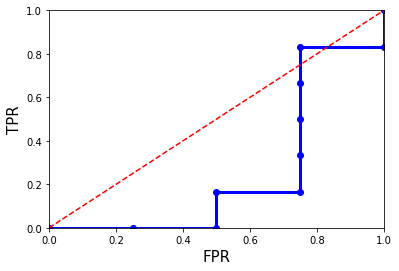

In [15]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
x_diag = 0.1* np.arange(11)
y_diag = 0.1* np.arange(11)
plt.plot(points[:,0],points[:,1],'bo-',linewidth=3)
plt.plot(x_diag,y_diag,'r--')
plt.xlabel('FPR',size=15)
plt.ylabel('TPR',size=15)

Text(0,0.5,'TPR')

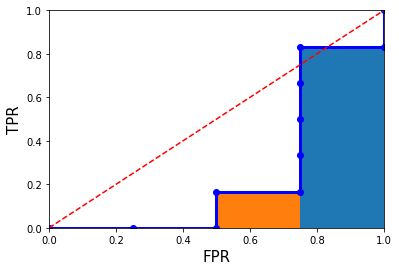

In [16]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
x_diag = 0.1* np.arange(11)
y_diag = 0.1* np.arange(11)
plt.plot(points[:,0],points[:,1],'bo-',linewidth=3)
plt.plot(x_diag,y_diag,'r--')
plt.bar(0.875,0.8333,width=0.25)
plt.bar(0.625,0.1667,width=0.25)
plt.xlabel('FPR',size=15)
plt.ylabel('TPR',size=15)

In [36]:
data['Pred'] = np.array([0.06,0.47,0.50,0.94,0.83,0.90,0.73,0.07,0.50,0.27])
data['True'] = np.array([1,1,1,0,1,0,0,0,0,1])

In [37]:
TP = len(data[data['Pred']>=0.5][data['True']==1])
FP = len(data[data['Pred']>=0.5][data['True']==0])
FN = len(data[data['Pred']<0.5][data['True']==1])
TN = len(data[data['Pred']<0.5][data['True']==0])
print(TP,FP,FN,TN)

2 4 3 1


/home/luo3300612/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/luo3300612/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/luo3300612/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/luo3300612/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [38]:
data.sort_values('Pred',inplace=True,ascending=False)

In [39]:
data

,Pred,True
8,0.94,0
0,0.90,0
4,0.83,1
7,0.73,0
2,0.50,1
3,0.50,0
9,0.47,1
1,0.27,1
6,0.07,0
5,0.06,1


Text(0,0.5,'TPR')

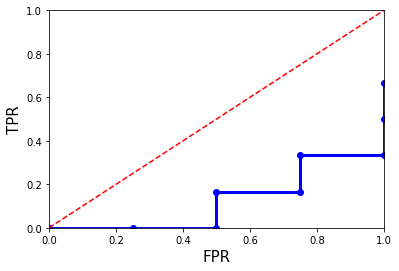

In [40]:
points = np.zeros((10,2))
for i in range(0,points.shape[0]):
    if data.iloc[i,1] == 0:
        points[i,0] = points[i-1,0] + 1/m_minus
        points[i,1] = points[i-1][1]
    elif data.iloc[i,1] == 1:
        points[i,0] = points[i-1,0]
        points[i,1] = points[i-1,1] + 1/m_plus
points = np.vstack((np.zeros((1,2)),points))
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
x_diag = 0.1* np.arange(11)
y_diag = 0.1* np.arange(11)
plt.plot(points[:,0],points[:,1],'bo-',linewidth=3)
plt.plot(x_diag,y_diag,'r--')
plt.xlabel('FPR',size=15)
plt.ylabel('TPR',size=15)

In [41]:
data

,Pred,True
8,0.94,0
0,0.90,0
4,0.83,1
7,0.73,0
2,0.50,1
3,0.50,0
9,0.47,1
1,0.27,1
6,0.07,0
5,0.06,1


In [42]:
data.iloc[4,1] = 0
data.iloc[5,1] = 1

In [43]:
data

,Pred,True
8,0.94,0
0,0.90,0
4,0.83,1
7,0.73,0
2,0.50,0
3,0.50,1
9,0.47,1
1,0.27,1
6,0.07,0
5,0.06,1


In [46]:
points = np.zeros((10,2))
for i in range(0,points.shape[0]):
    if data.iloc[i,1] == 0:
        points[i,0] = points[i-1,0] + 1/m_minus
        points[i,1] = points[i-1][1]
    elif data.iloc[i,1] == 1:
        points[i,0] = points[i-1,0]
        points[i,1] = points[i-1,1] + 1/m_plus
points = np.vstack((np.zeros((1,2)),points))

Text(0,0.5,'TPR')

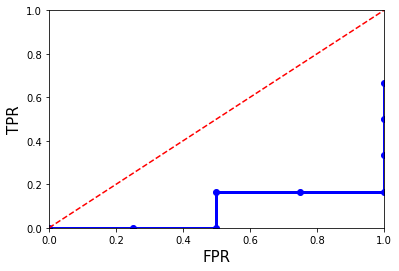

In [47]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
x_diag = 0.1* np.arange(11)
y_diag = 0.1* np.arange(11)
plt.plot(points[:,0],points[:,1],'bo-',linewidth=3)
plt.plot(x_diag,y_diag,'r--')
plt.xlabel('FPR',size=15)
plt.ylabel('TPR',size=15)

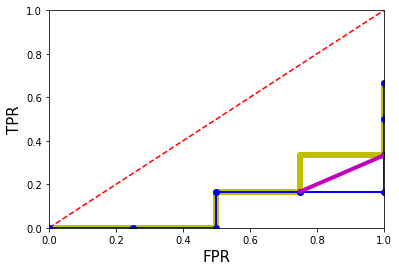

In [49]:
data['Pred'] = np.array([0.06,0.47,0.50,0.94,0.83,0.90,0.73,0.07,0.50,0.27])
data['True'] = np.array([1,1,1,0,1,0,0,0,0,1])
data.sort_values('Pred',inplace=True,ascending=False)

points = np.zeros((10,2))
for i in range(0,points.shape[0]):
    if data.iloc[i,1] == 0:
        points[i,0] = points[i-1,0] + 1/m_minus
        points[i,1] = points[i-1][1]
    elif data.iloc[i,1] == 1:
        points[i,0] = points[i-1,0]
        points[i,1] = points[i-1,1] + 1/m_plus
points = np.vstack((np.zeros((1,2)),points))
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
x_diag = 0.1* np.arange(11)
y_diag = 0.1* np.arange(11)
plt.plot(points[:,0],points[:,1],'yo-',linewidth=6)
plt.plot(x_diag,y_diag,'r--')
plt.xlabel('FPR',size=15)
plt.ylabel('TPR',size=15)

data.iloc[4,1] = 0
data.iloc[5,1] = 1

points = np.zeros((10,2))
for i in range(0,points.shape[0]):
    if data.iloc[i,1] == 0:
        points[i,0] = points[i-1,0] + 1/m_minus
        points[i,1] = points[i-1][1]
    elif data.iloc[i,1] == 1:
        points[i,0] = points[i-1,0]
        points[i,1] = points[i-1,1] + 1/m_plus
        
points = np.vstack((np.zeros((1,2)),points))
x_diag = 0.1* np.arange(11)
y_diag = 0.1* np.arange(11)
plt.plot(points[:,0],points[:,1],'bo-',linewidth=2)
plt.plot([0.75,1],[0.16667,0.3333],'m',linewidth=4)

In [120]:
points

array([[0.25      , 0.        ],
       [0.5       , 0.        ],
       [0.5       , 0.16666667],
       [0.75      , 0.16666667],
       [1.        , 0.16666667],
       [1.        , 0.33333333],
       [1.        , 0.5       ],
       [1.        , 0.66666667],
       [1.25      , 0.66666667],
       [1.25      , 0.83333333]])